# Tarea 3 IA

Jeffrey Leiva Cascante 2021016720

Richard León Chinchilla 2019003759

Se realizaron dos entrenamientos, config1 y config2.

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | encoder | Sequential | 108 K  | train
1 | decoder | Sequential | 109 K  | train
-----------------------------------------------
218 K     Trainable params
0         Non-trainable params
218 K     Total params
0.875     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

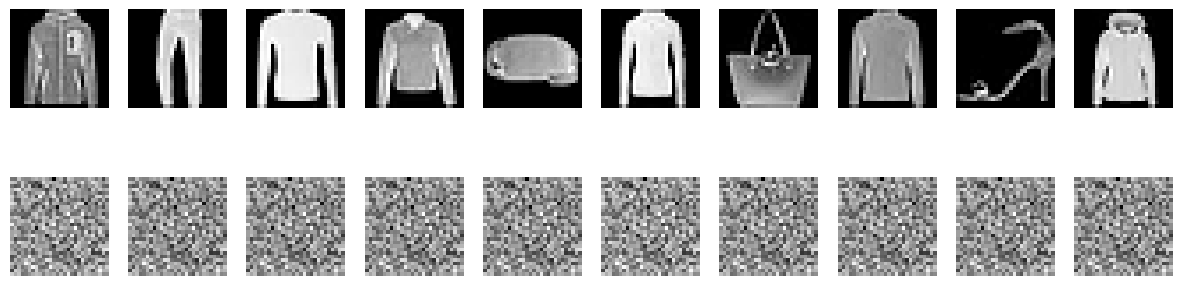

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

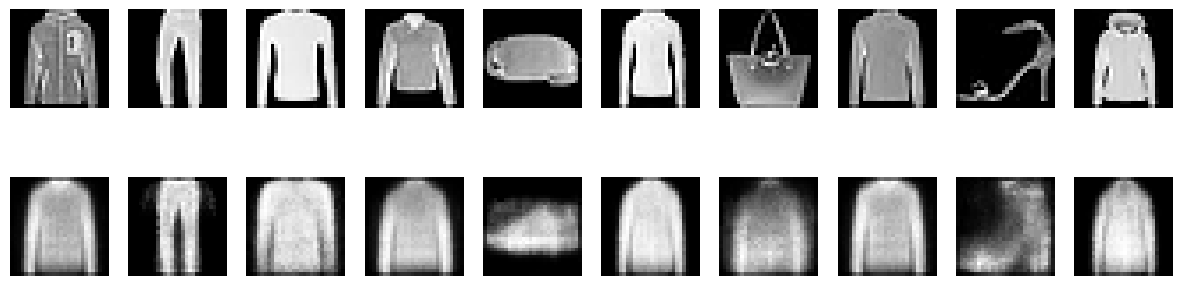

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

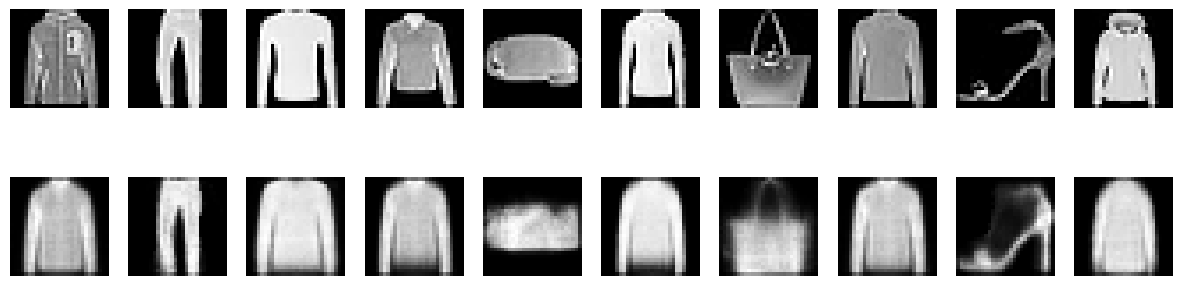

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

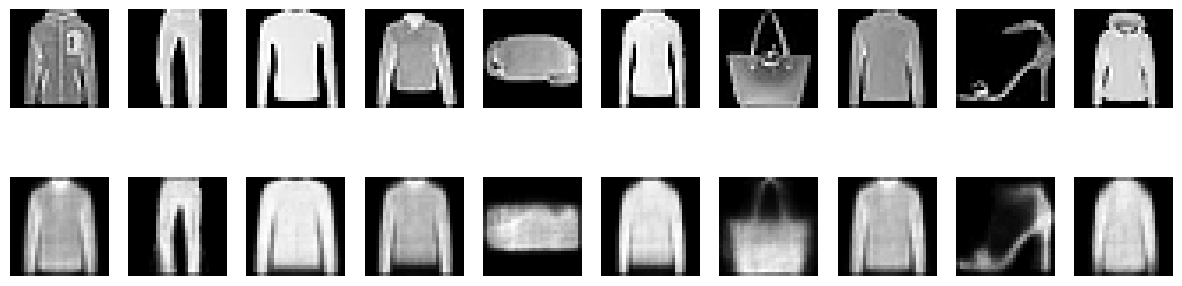

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

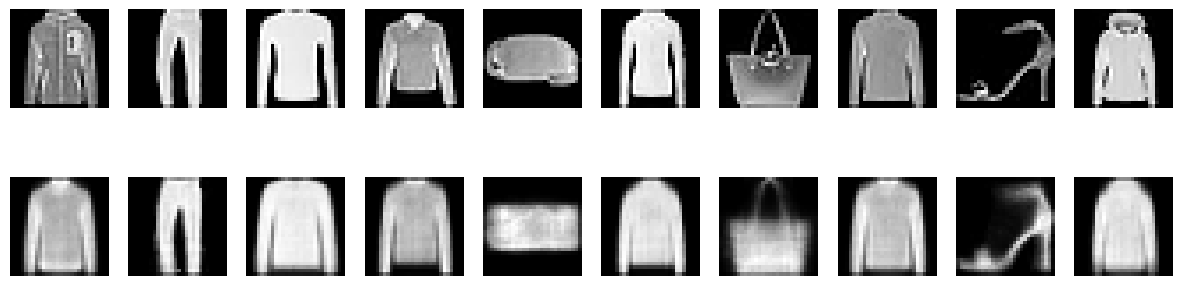

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\richa\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=5` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.02148934081196785    │
└───────────────────────────┴───────────────────────────┘

{'TRAIN': {'LEARNING_RATE': 0.001, 'BATCH_SIZE': 64, 'NUM_EPOCHS': 20, 'PRECISION': 'bf16-mixed', 'NUM_WORKERS': 4, 'ACCELERATION': 'gpu'}, 'MODEL': {'INPUT_SIZE': 784, 'LATENT_DIM': 3}, 'DATASET': {'DATA_DIR': './data'}}


In [4]:
import sys
import os
import hydra
from config.config import Configuration
from Autoencoder import AutoEncoder
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
import pytorch_lightning as L


notebook_dir = os.path.dirname(os.path.abspath(os.getcwd()))
config_dir = os.path.join(notebook_dir,"tarea03-IA\\config")

sys.argv = [arg for arg in sys.argv if not arg.startswith("--")]

@hydra.main(config_path=config_dir, config_name="config", version_base=None)
def training_one(config: Configuration):
    transform = transforms.ToTensor()
    train_dataset = datasets.FashionMNIST(root=config.DATASET.DATA_DIR, train=True, transform=transform, download=True)
    test_dataset = datasets.FashionMNIST(root=config.DATASET.DATA_DIR, train=False, transform=transform, download=True)

    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size

    train_data, val_data = random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(train_data, batch_size=config.TRAIN.BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=config.TRAIN.BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=config.TRAIN.BATCH_SIZE, shuffle=False)

    model = AutoEncoder(config.MODEL.INPUT_SIZE, config.MODEL.LATENT_DIM, config.TRAIN.LEARNING_RATE)
    
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION, 
                        precision=config.TRAIN.PRECISION)
    
    trainer.fit(model,train_loader,val_loader)
    trainer.test(model, test_loader)
    print(config)
   



training_one()

Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params | Mode 
-----------------------------------------------
0 | encoder | Sequential | 108 K  | train
1 | decoder | Sequential | 109 K  | train
-----------------------------------------------
218 K     Trainable params
0         Non-trainable params
218 K     Total params
0.875     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

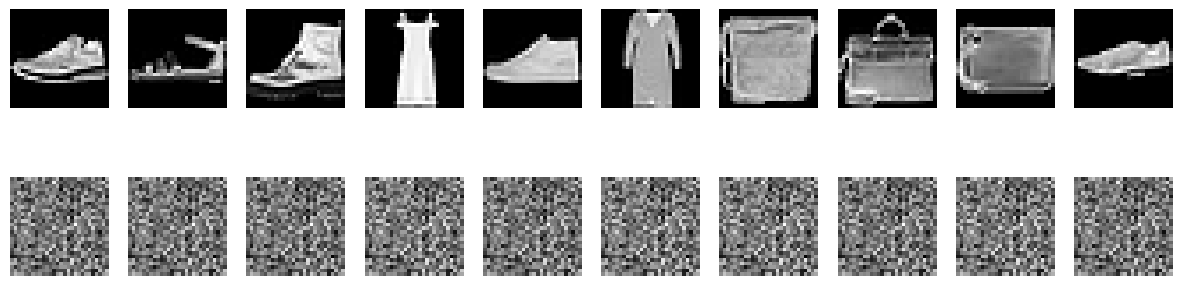

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

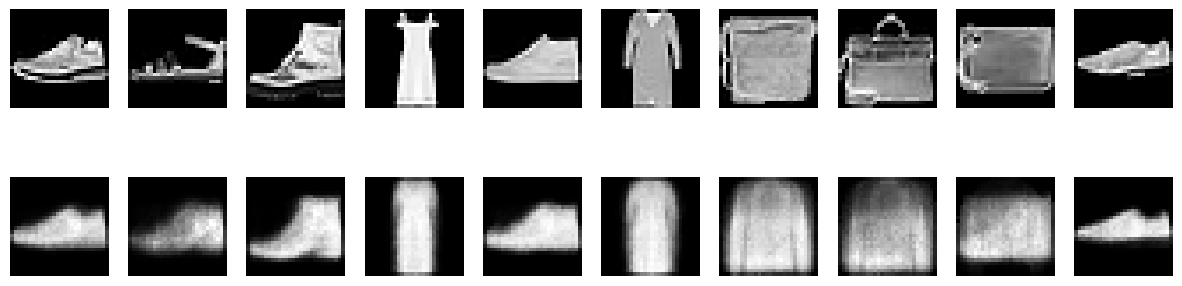

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

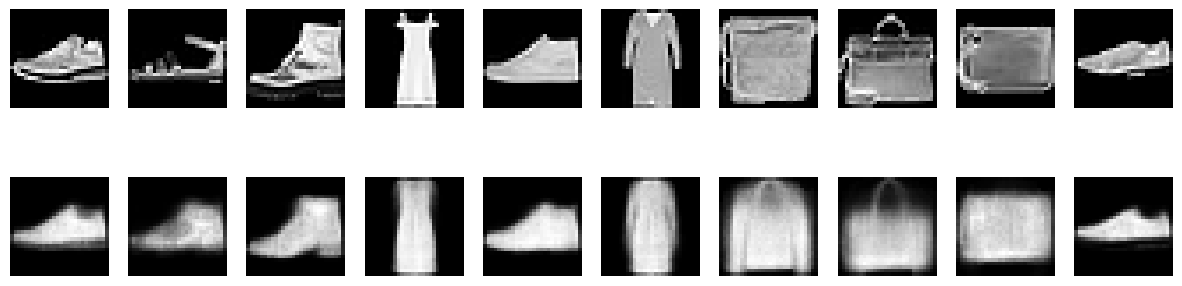

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

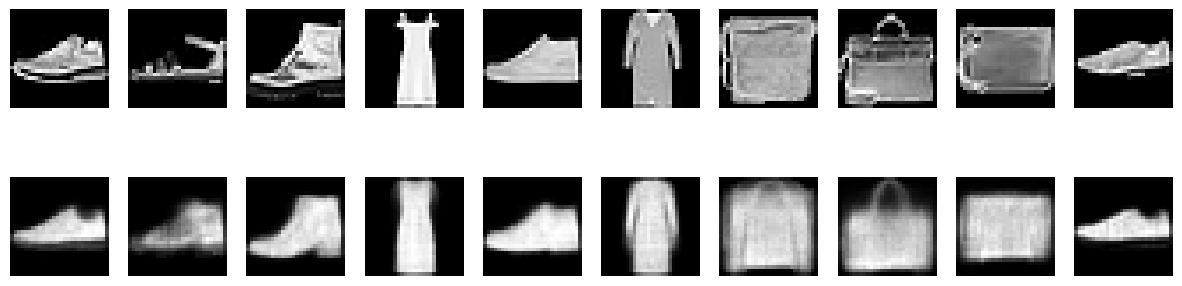

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

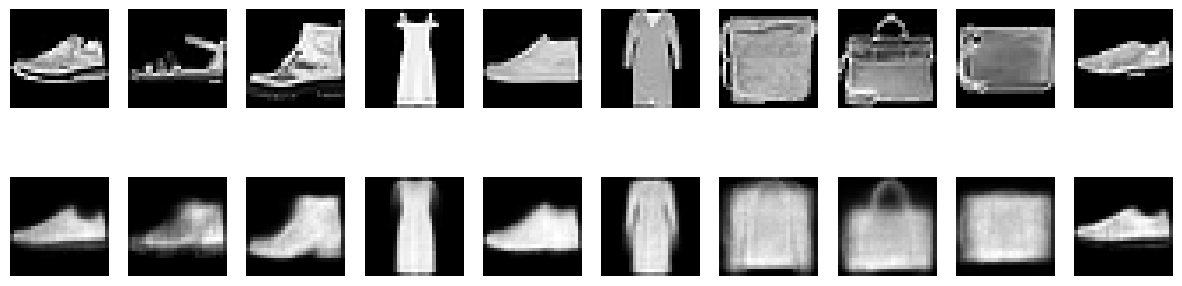

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

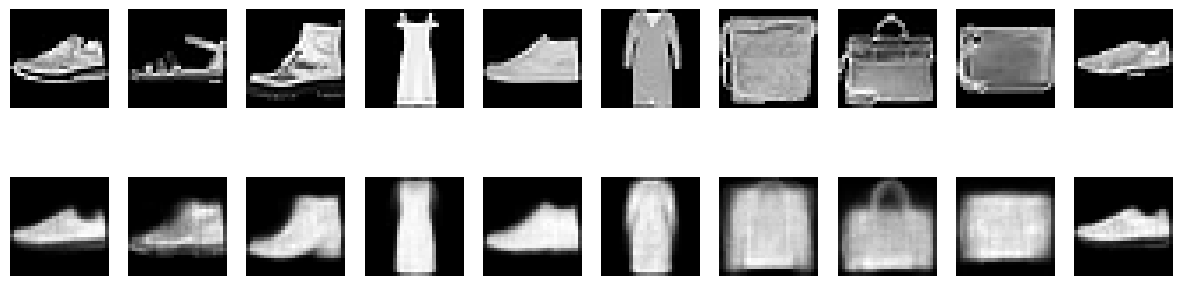

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

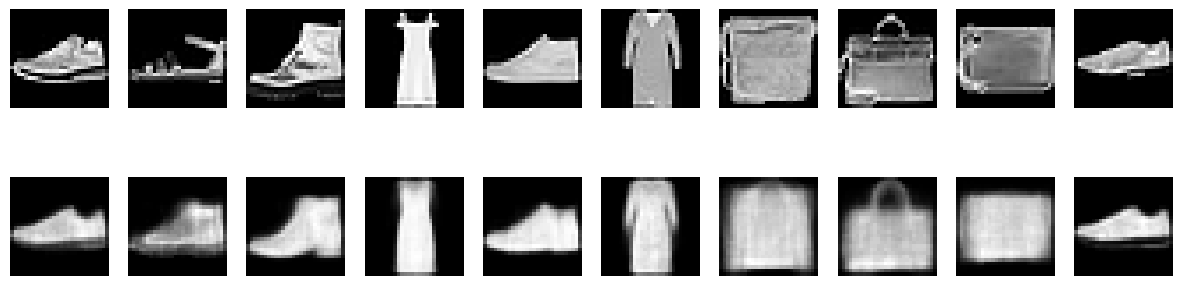

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.021119924262166023    │
└───────────────────────────┴───────────────────────────┘

{'TRAIN': {'LEARNING_RATE': 0.001, 'BATCH_SIZE': 64, 'NUM_EPOCHS': 30, 'PRECISION': 'bf16-mixed', 'NUM_WORKERS': 6, 'ACCELERATION': 'gpu'}, 'MODEL': {'INPUT_SIZE': 784, 'LATENT_DIM': 3}, 'DATASET': {'DATA_DIR': './data'}}


In [5]:
@hydra.main(config_path=config_dir, config_name="config2", version_base=None)
def training_two(config: Configuration):
    transform = transforms.ToTensor()
    train_dataset = datasets.FashionMNIST(root=config.DATASET.DATA_DIR, train=True, transform=transform, download=True)
    test_dataset = datasets.FashionMNIST(root=config.DATASET.DATA_DIR, train=False, transform=transform, download=True)

    train_size = int(0.8 * len(train_dataset))
    val_size = len(train_dataset) - train_size

    train_data, val_data = random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(train_data, batch_size=config.TRAIN.BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=config.TRAIN.BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=config.TRAIN.BATCH_SIZE, shuffle=False)

    model = AutoEncoder(config.MODEL.INPUT_SIZE, config.MODEL.LATENT_DIM, config.TRAIN.LEARNING_RATE)
    
    trainer = L.Trainer(max_epochs=config.TRAIN.NUM_EPOCHS, accelerator=config.TRAIN.ACCELERATION, 
                        precision=config.TRAIN.PRECISION)
    
    trainer.fit(model,train_loader,val_loader)
    trainer.test(model, test_loader)
    print(config)

training_two()